
## Problem Definition
A company is selling products to customers. They do a lot of activities such as visiting customers, sending emails, hosting events and so on and so on to close deals. They want to utilize their data to

- predict the probability of closing deals with each customer
- evaluate the activities they have done to close deals with customers.

They have two types of dataset, activity data and target data.

## Dataset
### Activity data
Activity data is a record of activities they have done to each customer. You can refer to the activity.csv for all activity data they have at the moment.

|column name|description|
|----|----|
|data|date when the activity has been done|
|customer|customer id to whom activity has been made|
|activity_type|type of the activity. There are 25 types, {a-y} at the moment.|
|activity_count|number of times the activity has been made on that date.|

Note that activity types are obfuscated for security reason.

### Target data
Target data is a record of closed deals. Each record represents the date a deal has been closed with a customer. You can refer to the target.csv for all target data they have at the moment.

|column name|description|
|----|----|
|customer|customer id with whom the deal has been closed|
|date|date when a deal has been closed with the customer|

## Task Assignment
You are asked to work on two topics, activity contribution and prediction.

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Import dataset
active = pd.read_csv('activity.csv')
target = pd.read_csv('target.csv')

In [3]:
#Check The Columns name
active.columns

Index(['date', 'customer', 'activity_type', 'activity_count'], dtype='object')

In [4]:
#Check Columns name and rename it
target.columns
target.rename(columns={'date':'close_date'},inplace=True)

In [5]:
#Merge two dataset
df = pd.merge(active, target, on=['customer']) 
df.head()

,date,customer,activity_type,activity_count,close_date
0,2020-10-19,0032j000004etUWAAY,a,1,2021-04-07
1,2021-02-12,0032j000004etUWAAY,d,1,2021-04-07
2,2021-04-07,0032j000004etUWAAY,h,1,2021-04-07
3,2021-01-16,0032j000004etUWAAY,h,1,2021-04-07
4,2021-04-07,0032j000004etUWAAY,v,1,2021-04-07


In [6]:
#Find Details in merge dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102285 entries, 0 to 102284
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            102285 non-null  object
 1   customer        102285 non-null  object
 2   activity_type   102285 non-null  object
 3   activity_count  102285 non-null  int64 
 4   close_date      102285 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [7]:
#Convert date coluns to Datetime
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df['close_date'] = pd.to_datetime(df['close_date'],infer_datetime_format=True)
#df['diff'] = df['close_date'] - df['date']
df.head()

,date,customer,activity_type,activity_count,close_date
0,2020-10-19,0032j000004etUWAAY,a,1,2021-04-07
1,2021-02-12,0032j000004etUWAAY,d,1,2021-04-07
2,2021-04-07,0032j000004etUWAAY,h,1,2021-04-07
3,2021-01-16,0032j000004etUWAAY,h,1,2021-04-07
4,2021-04-07,0032j000004etUWAAY,v,1,2021-04-07


In [10]:
#Difference between dates
df["Recency"] = df['close_date'] - df["date"]
df.head()

,date,customer,activity_type,activity_count,close_date,Recency
0,2020-10-19,0032j000004etUWAAY,a,1,2021-04-07,170 days
1,2021-02-12,0032j000004etUWAAY,d,1,2021-04-07,54 days
2,2021-04-07,0032j000004etUWAAY,h,1,2021-04-07,0 days
3,2021-01-16,0032j000004etUWAAY,h,1,2021-04-07,81 days
4,2021-04-07,0032j000004etUWAAY,v,1,2021-04-07,0 days


In [11]:
#Groupby data and aggregate the outputs
df_rf = df.groupby("activity_type").agg({"activity_count": "count",
                                      "Recency" : "min"})
df_rf

,activity_count,Recency
activity_type,,
a,4976,0 days
b,375,0 days
c,108,0 days
d,138,0 days
e,2,11 days
f,117,1 days
g,11,54 days
h,2667,0 days
i,6655,0 days


In [12]:
df_rf = pd.DataFrame.rename(df_rf , columns = {"activity_count" : "Frequency"})
df_rf.head()

,Frequency,Recency
activity_type,,
a,4976,0 days
b,375,0 days
c,108,0 days
d,138,0 days
e,2,11 days


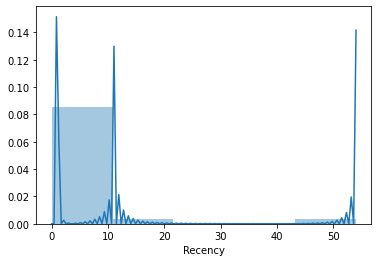

In [15]:
#Recency distribution plot
import seaborn as sns
df_rf['Recency'] = df_rf['Recency'].dt.days.astype('int16')
x = df_rf['Recency']

ax = sns.distplot(x)

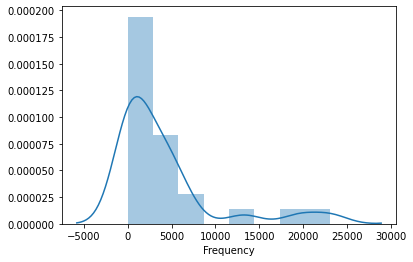

In [16]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = df_rf['Frequency']

ax = sns.distplot(x)

In [17]:
#Split into four segments using quantiles
quantiles = df_rf.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [18]:
quantiles

{'Frequency': {0.25: 138.0, 0.5: 1760.0, 0.75: 4825.0},
 'Recency': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [19]:
#Functions to create R, F segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [20]:
#Calculate Add R, F segment value columns in the existing dataset to show R, F segment values
df_rf['R'] = df_rf['Recency'].apply(RScoring, args=('Recency',quantiles,))
df_rf['F'] = df_rf['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
df_rf.head()

,Frequency,Recency,R,F
activity_type,,,,
a,4976,0,1,1
b,375,0,1,3
c,108,0,1,4
d,138,0,1,4
e,2,11,4,4


In [21]:
#Calculate and Add RFGroup value column showing combined concatenated score of RF
df_rf['RFGroup'] = df_rf.R.map(str) + df_rf.F.map(str) 

#Calculate and Add RFScore value column showing total sum of RFGroup values
df_rf['RFScore'] = df_rf[['R', 'F']].sum(axis = 1)
df_rf.head()

,Frequency,Recency,R,F,RFGroup,RFScore
activity_type,,,,,,
a,4976,0,1,1,11,2
b,375,0,1,3,13,4
c,108,0,1,4,14,5
d,138,0,1,4,14,5
e,2,11,4,4,44,8


In [23]:
#Assign contribution Level to each activity
contribution = [1, 0]
Score_cuts = pd.qcut(df_rf.RFScore, q = 2, labels = contribution)
df_rf['RF_contribution_Level'] = Score_cuts.values
df_rf.reset_index().head()

,activity_type,Frequency,Recency,R,F,RFGroup,RFScore,RF_contribution_Level
0,a,4976,0,1,1,11,2,1
1,b,375,0,1,3,13,4,1
2,c,108,0,1,4,14,5,0
3,d,138,0,1,4,14,5,0
4,e,2,11,4,4,44,8,0


In [30]:
#output the result.csv
df_rf[['RF_contribution_Level']].to_csv('result.csv')